In [1]:
#import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#read in csv, create pandas dataframe
data = pd.read_csv('crypto_data.csv')
crypto_df=pd.DataFrame(data)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#filter to show only cryptos that are currently trading
crypto_df = crypto_df.loc[crypto_df['IsTrading']==True]
crypto_df.nunique()

Unnamed: 0         1144
CoinName           1137
Algorithm            89
IsTrading             1
ProofType            36
TotalCoinsMined     520
TotalCoinSupply     513
dtype: int64

In [4]:
#drop Istrading Column
crypto_df = crypto_df.drop(columns = 'IsTrading')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#Identify number of rows with nulls that must be dropped
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
#drop rows with a null value
crypto_df = crypto_df.dropna()
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [7]:
#Filter out cryptos that have 0 totalcoinsmined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined']>0]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [8]:
#drop coin name column, because the model cannot cluster 

crypto_df2 = crypto_df.drop('Unnamed: 0', axis = 1).drop('CoinName', axis = 1)
crypto_df2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
#convert categorical data to numberic data using dummy variables for categorical data.

crypto_cat_df = pd.get_dummies(crypto_df2, columns=['Algorithm', 'ProofType'])
crypto_cat_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Scale the data, so that large values don't unduly influence the model
scaled_crypto_df = StandardScaler().fit_transform(crypto_cat_df)
print(scaled_crypto_df [0:6])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [11]:
#Use PCA to narrow the number of fields
pca = PCA(n_components = 0.9)
crypto_pca = pca.fit_transform(scaled_crypto_df)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         3.78193757e-15, -4.01515397e-16,  2.42668141e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         3.35586611e-15, -5.76223131e-16,  5.07176679e-18],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -7.36743549e-14,  3.18251149e-14, -1.96786531e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -1.98949353e-14,  3.42963077e-14, -6.67699842e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         1.03030237e-15,  2.19497009e-15, -6.63628273e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         2.60414021e-15,  2.42759601e-16, -1.50589572e-15]])

In [12]:
#Create PCA dataframe
crypto_pca_df=pd.DataFrame(
                data= crypto_pca, columns=["pc 1", "pc 2", "pc 3", "pc 4", "pc 5", "pc 6", "pc 7", "pc 8", "pc 9", "pc 10",
                                          "pc 11", "pc 12", "pc 13", "pc 14", "pc 15", "pc 16", "pc 17", "pc 18", "pc 19", "pc 20",
                                          "pc 21", "pc 22", "pc 23", "pc 24", "pc 25", "pc 26", "pc 27", "pc 28", "pc 29", "pc 30",
                                          "pc 31", "pc 32", "pc 33", "pc 34", "pc 35", "pc 36", "pc 37", "pc 38", "pc 39", "pc 40",
                                          "pc 41", "pc 42", "pc 43", "pc 44", "pc 45", "pc 46", "pc 47", "pc 48", "pc 49", "pc 50",
                                          "pc 51", "pc 52", "pc 53", "pc 54", "pc 55", "pc 56", "pc 57", "pc 58", "pc 59", "pc 60",
                                          "pc 61", "pc 62", "pc 63", "pc 64", "pc 65", "pc 66", "pc 67", "pc 68", "pc 69", "pc 70",
                                          "pc 71", "pc 72", "pc 73", "pc 74"]
)
crypto_pca_df.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 65,pc 66,pc 67,pc 68,pc 69,pc 70,pc 71,pc 72,pc 73,pc 74
0,-0.335099,1.032189,-0.590713,0.001397,-1.542637e-14,-1.165476e-11,1.940305e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
1,-0.318434,1.032331,-0.591126,0.001386,-1.526824e-14,-1.155975e-11,1.957805e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
2,2.305468,1.656383,-0.683617,0.004731,-1.478301e-14,-3.949449e-11,3.759289e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
3,-0.145184,-1.320593,0.192813,-0.001229,3.751275e-15,1.025361e-11,-9.093496e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.616118e-14,1.423168e-11,-1.198958e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13


In [13]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [14]:
# Create a new dataframe for t-SNE
tsne_df = crypto_pca_df

In [15]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [16]:
#reduce dimensions using tsne
tsne_features = tsne.fit_transform(tsne_df)
tsne_features.shape

(532, 2)

In [17]:
# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

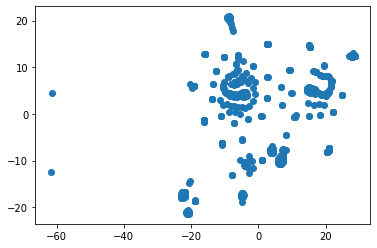

In [18]:
# Visualize the clusters
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

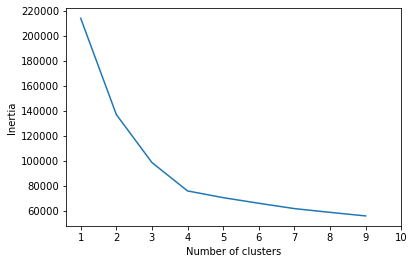

In [19]:
#Determine appropriate number of clusters for K-Means model
inertia = []
# Same as k = list(range(1, 10))
k = [1,2,3,4,5,6,7,8,9]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
# Initializing model with K = 4 based on elbow of inertia graph
model = KMeans(n_clusters=4, random_state=42)

In [21]:
model.fit(tsne_df)

KMeans(n_clusters=4, random_state=42)

In [22]:
predictions = model.predict(tsne_df)
print(predictions)

[0 0 0 1 3 3 2 3 3 3 2 3 1 1 3 0 2 3 0 0 3 3 1 3 3 0 0 0 3 0 3 0 3 2 3 0 3
 1 3 3 3 3 2 3 3 3 3 3 3 0 2 3 2 1 3 3 3 0 3 3 2 3 1 2 0 3 1 3 0 3 0 0 0 3
 3 3 2 2 1 3 1 0 2 1 1 1 2 0 0 3 3 2 3 2 3 1 0 0 3 3 3 2 3 1 0 3 2 3 0 3 2
 3 0 0 3 3 2 3 3 3 0 3 3 3 1 3 2 0 2 3 1 0 2 2 3 3 2 3 0 2 1 0 2 1 0 3 3 1
 2 3 1 1 0 0 2 2 3 3 3 2 2 1 3 2 3 2 2 1 1 0 2 3 2 0 0 0 0 2 2 3 2 0 3 1 1
 2 0 3 0 3 2 1 3 3 0 2 0 2 3 2 0 0 2 0 3 3 2 2 3 2 0 2 2 0 0 2 2 2 1 0 1 0
 0 2 3 0 2 0 0 0 3 3 3 3 0 1 2 0 2 0 3 2 3 3 0 2 3 0 3 3 2 3 2 0 2 3 2 2 0
 2 2 0 0 0 1 2 3 2 1 2 0 0 1 3 2 3 0 3 2 3 3 0 2 0 0 3 0 3 2 2 0 3 0 3 3 0
 2 2 0 1 2 2 1 3 2 3 3 3 3 3 0 0 3 2 2 2 3 3 2 0 3 2 3 0 1 0 0 3 0 0 3 2 0
 1 2 3 3 3 2 2 0 0 3 0 3 3 3 0 0 2 3 0 0 3 2 0 2 3 0 3 3 0 0 2 2 1 0 2 3 3
 3 3 0 3 3 3 2 0 3 3 3 3 2 0 3 2 0 2 2 3 3 3 3 0 0 0 3 2 3 2 2 0 1 2 0 2 3
 3 0 0 3 2 3 2 3 3 3 3 0 2 3 0 3 0 0 3 0 1 2 3 3 2 3 0 0 2 2 0 3 0 3 3 0 3
 2 2 2 2 1 0 2 2 0 2 3 3 3 0 3 1 0 2 3 0 3 3 3 3 3 0 3 0 3 0 0 3 2 0 0 0 2
 1 0 1 2 2 0 3 2 3 0 3 0 

In [23]:
tsne_df["class"]=model.labels_
tsne_df.head(10)

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 68,pc 69,pc 70,pc 71,pc 72,pc 73,pc 74,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-1.542637e-14,-1.165476e-11,1.940305e-14,-0.007129,-1.319756,-0.051813,...,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16,14.559660,5.580067,0
1,-0.318434,1.032331,-0.591126,0.001386,-1.526824e-14,-1.155975e-11,1.957805e-14,-0.007739,-1.322514,-0.056674,...,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18,20.684423,8.116035,0
2,2.305468,1.656383,-0.683617,0.004731,-1.478301e-14,-3.949449e-11,3.759289e-14,-0.054781,-1.542879,-0.943951,...,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14,26.917122,12.370611,0
3,-0.145184,-1.320593,0.192813,-0.001229,3.751275e-15,1.025361e-11,-9.093496e-15,-0.002071,0.281463,0.251862,...,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14,-23.085400,-17.639418,1
4,-0.151768,-2.036192,0.396182,-0.001705,1.616118e-14,1.423168e-11,-1.198958e-14,0.027735,0.519099,0.188820,...,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13,-15.939021,12.824064,3
5,-0.165743,-1.125922,-0.012370,-0.000602,-1.965222e-15,5.024703e-12,-3.388552e-15,0.013188,-0.397969,-0.026772,...,-6.085348e-16,-1.052670e-15,3.533702e-15,-2.396458e-15,2.362477e-15,-1.941287e-15,3.045503e-15,-8.663628,4.336276,3
6,-0.395438,1.237148,-0.517551,0.001434,-1.270791e-14,-1.196514e-11,1.708472e-14,-0.003507,-0.995206,0.143813,...,-2.530727e-15,5.027245e-16,7.143556e-16,-3.408562e-16,4.900525e-16,2.680468e-15,-2.289556e-15,5.946344,-9.747672,2
7,-0.149606,-2.223198,0.423077,-0.001835,2.202992e-15,1.531913e-11,-7.739032e-15,0.032040,0.330794,0.309200,...,6.848518e-14,-3.591194e-14,4.923299e-14,3.221107e-13,-1.391910e-13,4.348524e-13,-2.656721e-13,-10.115888,12.301686,3
8,-0.150210,-2.036294,0.396162,-0.001703,1.620796e-14,1.421459e-11,-1.203335e-14,0.027718,0.518802,0.188300,...,-8.821911e-14,-7.791146e-14,-6.629268e-14,3.878960e-14,-7.427599e-14,1.313172e-13,-2.982473e-13,-15.939014,12.824027,3
9,-0.149363,-2.049335,0.412968,-0.001745,8.545309e-15,1.455608e-11,-1.943921e-14,0.028954,0.544389,0.233373,...,-1.066071e-15,3.700964e-16,7.297066e-16,-2.055214e-15,1.067537e-15,2.188394e-15,-5.945674e-16,-19.243946,6.034571,3


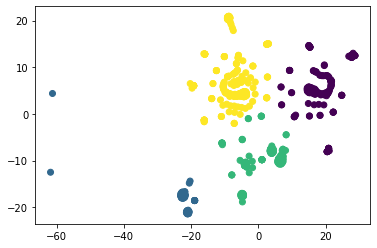

In [24]:
#Group t-sne dataset visualization into clusters
plt.scatter(x=tsne_df['x'], y=tsne_df['y'], c=tsne_df['class'])

plt.show()

The cryptocurrencies can be grouped into four distinct clusters. The strategy of reducing the number of fields in the dataset first with PCA, then with t-sne allowed us to clearly visualize the cluster groupings we found using K-means while retaining 90% of the variance explained by the model.    